In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from sklearn import metrics



In [2]:
df = yf.download(tickers = "EURUSD=X",period = "2y",interval = "1h",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)
df = pd.DataFrame(df)
df =df.drop(['Volume'],1)
df =df.drop(['Open'],1)
df =df.drop(['High'],1)
df =df.drop(['Low'],1)
df = df[:-24]
print(df)


[*********************100%***********************]  1 of 1 completed
                              Close
2020-09-23 12:00:00+01:00  1.169454
2020-09-23 13:00:00+01:00  1.169454
2020-09-23 14:00:00+01:00  1.168770
2020-09-23 15:00:00+01:00  1.167542
2020-09-23 16:00:00+01:00  1.168088
...                             ...
2022-09-22 09:00:00+01:00  0.988240
2022-09-22 10:00:00+01:00  0.985999
2022-09-22 11:00:00+01:00  0.988142
2022-09-22 12:00:00+01:00  0.986972
2022-09-22 13:00:00+01:00  0.988045

[12357 rows x 1 columns]


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9940\3697082922.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Volume'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9940\3697082922.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Open'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9940\3697082922.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['High'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9940\3697082922.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Low'],1)


In [3]:
for i in range(1, 56):
    df[f"Close{i}"] = df["Close"].shift(-i)
    
df = df[:-55]
print(df)    

                              Close    Close1    Close2    Close3    Close4  \
2020-09-23 12:00:00+01:00  1.169454  1.169454  1.168770  1.167542  1.168088   
2020-09-23 13:00:00+01:00  1.169454  1.168770  1.167542  1.168088  1.168497   
2020-09-23 14:00:00+01:00  1.168770  1.167542  1.168088  1.168497  1.168497   
2020-09-23 15:00:00+01:00  1.167542  1.168088  1.168497  1.168497  1.166317   
2020-09-23 16:00:00+01:00  1.168088  1.168497  1.168497  1.166317  1.166861   
...                             ...       ...       ...       ...       ...   
2022-09-20 02:00:00+01:00  1.002707  1.003512  1.003210  1.002305  1.002004   
2022-09-20 03:00:00+01:00  1.003512  1.003210  1.002305  1.002004  1.003110   
2022-09-20 04:00:00+01:00  1.003210  1.002305  1.002004  1.003110  1.003714   
2022-09-20 05:00:00+01:00  1.002305  1.002004  1.003110  1.003714  1.001202   
2022-09-20 06:00:00+01:00  1.002004  1.003110  1.003714  1.001202  1.000801   

                             Close5    Close6    Cl

In [4]:
forecast_out = int(1)
df['PredictionClose'] = df['Close55'].shift(-forecast_out)
print(df)

                              Close    Close1    Close2    Close3    Close4  \
2020-09-23 12:00:00+01:00  1.169454  1.169454  1.168770  1.167542  1.168088   
2020-09-23 13:00:00+01:00  1.169454  1.168770  1.167542  1.168088  1.168497   
2020-09-23 14:00:00+01:00  1.168770  1.167542  1.168088  1.168497  1.168497   
2020-09-23 15:00:00+01:00  1.167542  1.168088  1.168497  1.168497  1.166317   
2020-09-23 16:00:00+01:00  1.168088  1.168497  1.168497  1.166317  1.166861   
...                             ...       ...       ...       ...       ...   
2022-09-20 02:00:00+01:00  1.002707  1.003512  1.003210  1.002305  1.002004   
2022-09-20 03:00:00+01:00  1.003512  1.003210  1.002305  1.002004  1.003110   
2022-09-20 04:00:00+01:00  1.003210  1.002305  1.002004  1.003110  1.003714   
2022-09-20 05:00:00+01:00  1.002305  1.002004  1.003110  1.003714  1.001202   
2022-09-20 06:00:00+01:00  1.002004  1.003110  1.003714  1.001202  1.000801   

                             Close5    Close6    Cl

In [5]:
X = np.array(df.drop(['PredictionClose'],1))
#X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
df = df[:-forecast_out]
#print(df)


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_9940\3182839119.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


In [6]:
features = X.shape[1]
print( features)

test_point = np.round(len(df)*0.1)
test_index = int(len(df)-test_point)

train = df.iloc[:test_index]
test = df.iloc[test_index:]

X_train, Y_train = train.iloc[:, :-1], pd.DataFrame(train.iloc[:, -1])
X_test, Y_test = test.iloc[:, :-1], pd.DataFrame(test.iloc[:, -1])

length = 1

trainX = np.array([X_train], order='C')
trainX.resize((X_train.shape[0], length, features))
testX = np.array([X_test], order='C')
testX.resize((X_test.shape[0], length, features))

forecastX = np.array([X_forecast], order='C')
forecastX.resize((X_forecast.shape[0], length, features))


56


In [7]:
# Training
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model = Sequential()
model.add(LSTM(features, input_shape=(length,features), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')
model.fit(trainX, Y_train,
          epochs=100,
          batch_size=10, 
          validation_data=(testX, Y_test),
          callbacks=[early_stop]
          )

Epoch 1/100
1108/1108 [==============================] - 4s 2ms/step - loss: 0.0037 - val_loss: 1.1293e-04
Epoch 2/100
1108/1108 [==============================] - 2s 2ms/step - loss: 2.1008e-05 - val_loss: 2.3334e-05
Epoch 3/100
1108/1108 [==============================] - 2s 2ms/step - loss: 2.2742e-05 - val_loss: 2.6752e-05
Epoch 4/100
1108/1108 [==============================] - 2s 2ms/step - loss: 2.8083e-05 - val_loss: 2.6523e-05
Epoch 5/100
1108/1108 [==============================] - 2s 2ms/step - loss: 3.9755e-05 - val_loss: 1.3384e-04
Epoch 6/100
1108/1108 [==============================] - 2s 2ms/step - loss: 3.4217e-05 - val_loss: 1.5973e-04
Epoch 7/100
1108/1108 [==============================] - 2s 2ms/step - loss: 3.4890e-05 - val_loss: 2.8673e-05
Epoch 7: early stopping


<AxesSubplot:>

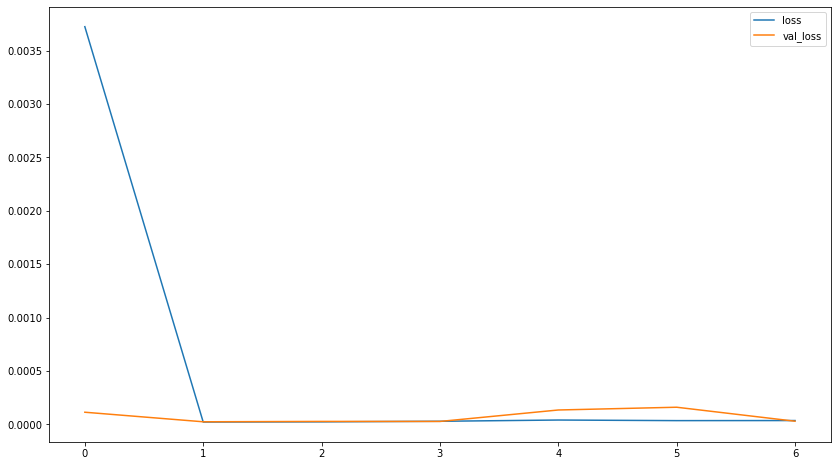

In [8]:
loss = pd.DataFrame(model.history.history)
loss.plot(figsize=(14,8))

In [9]:
#Testing
testpredictions = model.predict(testX)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

39/39 [==============================] - 0s 1ms/step
R2 Score is:  0.884968336728943
Mean Squared Error is:  2.867301972364297e-05
Root Mean Squared Error is:  0.005354719387945831
Mean Absolute Error is:  0.004295137258079963
Mean Absolute Percentage Error is:  0.004266815604657965


In [10]:
'''
#print(forecastX)
fp1 = model.predict(forecastX)
#print(fp1)
forecastX1 = np.roll(forecastX, -1)
forecastX1[:, : , -1] = fp1
#print(forecastX1)
fp2 = model.predict(forecastX1)



#print(fp2)
forecastX2 = np.roll(forecastX1, -1)
forecastX2[:, : , -1] = fp2
#print(forecastX2)
fp3 = model.predict(forecastX2)
#print(fp3)
forecastX3 = np.roll(forecastX2, -1)
forecastX3[:, : , -1] = fp3
#print(forecastX3)
fp4 = model.predict(forecastX3)
#print(fp4)
forecastX4 = np.roll(forecastX3, -1)
forecastX4[:, : , -1] = fp4
#print(forecastX4)
fp5 = model.predict(forecastX4)
#print(fp5
'''



'\n#print(forecastX)\nfp1 = model.predict(forecastX)\n#print(fp1)\nforecastX1 = np.roll(forecastX, -1)\nforecastX1[:, : , -1] = fp1\n#print(forecastX1)\nfp2 = model.predict(forecastX1)\n\n\n\n#print(fp2)\nforecastX2 = np.roll(forecastX1, -1)\nforecastX2[:, : , -1] = fp2\n#print(forecastX2)\nfp3 = model.predict(forecastX2)\n#print(fp3)\nforecastX3 = np.roll(forecastX2, -1)\nforecastX3[:, : , -1] = fp3\n#print(forecastX3)\nfp4 = model.predict(forecastX3)\n#print(fp4)\nforecastX4 = np.roll(forecastX3, -1)\nforecastX4[:, : , -1] = fp4\n#print(forecastX4)\nfp5 = model.predict(forecastX4)\n#print(fp5\n'

In [11]:
array = []
temp =  model.predict(forecastX)
array.append(temp)
features = np.roll(forecastX, -1)
features[:, : , -1] = temp
for i in range(24):
    predicted_value = model.predict(features)
    features = np.roll(features, -1)
    features[:, :, -1] = predicted_value
    array.append(predicted_value)


1/1 [==============================] - 0s 16ms/step


In [12]:
#forecast_prediction = np.concatenate((fp1,fp2,fp3,fp4))
#print(forecast_prediction)

In [13]:
array = np.asarray(array).reshape(-1)
array

array([0.9918022 , 0.99152267, 0.99183327, 0.99216837, 0.99163175,
       0.9918312 , 0.9916353 , 0.99175036, 0.9924642 , 0.99200284,
       0.99200267, 0.9929025 , 0.9930918 , 0.99327344, 0.99349374,
       0.9932599 , 0.99402475, 0.9938822 , 0.9940088 , 0.99465424,
       0.99461406, 0.9950879 , 0.99536717, 0.9949467 , 0.9948861 ],
      dtype=float32)

Max = 0.99536717
Min = 0.99152267


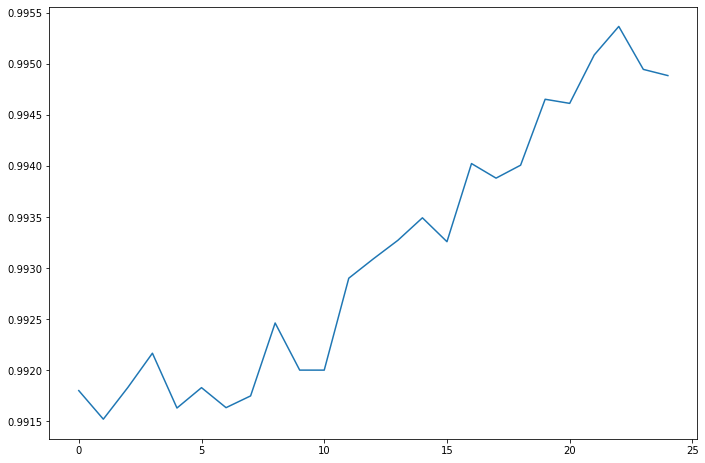

In [14]:
print('Max =',max(array))
print('Min =',min(array))
plt.axes([1, 2, 1.5 , 1.5])
plt.plot(array)
